# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json
from pprint import pprint

# Import API key
from config import api_key

# Import citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# https://openweathermap.org/api
# url = "http://api.openweathermap.org/data/2.5/weather?"
# city = "Houston"
# units = "imperial"

# Build query URL
# query_url = url + "appid=" + api_key + "&q=" + city +"&units=" + units

#_____________________________________________________
# url = "https://api.spacexdata.com/v3/rockets/falcon9"
# #could try this - and get back a list object
# #url = "https://api.spacexdata.com/v3/rockets"
#______________________________________________________

# # Request API response and store in variable called "response"
# response = requests.get(url)

# # create new variable that contains the json output from the request
# response_json = response.json()

# print(type(response_json))

#_______________________________________________________
response_json=[]

cloudiness=[]
wind=[]
lat=[]
lon=[]
humidity=[]
max_temp=[]
City=[]
Country=[]
Date=[]

units = "imperial"
url="http://api.openweathermap.org/data/2.5/weather?"

#use this to test code more easily:  for city in cities[0:5]:

for city in cities:
    print(f"Making request for city: {city}")
    query_url = url + "appid=" + api_key + "&q=" + city +"&units=" + units
    #print(query_url)
    
    city_weather = requests.get(query_url).json()
    
    try:
        cloudiness.append(city_weather['clouds']['all'])
        wind.append(city_weather['wind']['speed'])
        lat.append(city_weather['coord']['lat'])
        lon.append(city_weather['coord']['lon'])
        humidity.append(city_weather['main']['humidity'])
        max_temp.append(city_weather['main']['temp_max'])
        City.append(city_weather['name'])
        Country.append(city_weather['sys']['country'])
        Date.append(city_weather['dt'])
    except KeyError:
        print("Oops, that city doesn't exist.")
        pass

    
    
    
#print(city_weather['wind']['speed'])
    

Making request for city: meulaboh
Making request for city: avera
Making request for city: itarema
Making request for city: ushuaia
Making request for city: mansa
Making request for city: kiunga
Making request for city: albany
Making request for city: lorengau
Making request for city: hermanus
Making request for city: mataura
Making request for city: kapaa
Making request for city: raga
Oops, that city doesn't exist.
Making request for city: artyk
Oops, that city doesn't exist.
Making request for city: hasaki
Making request for city: santiago del estero
Making request for city: rikitea
Making request for city: alofi
Making request for city: tukrah
Oops, that city doesn't exist.
Making request for city: ribeira grande
Making request for city: busselton
Making request for city: bluff
Making request for city: mount isa
Making request for city: castro
Making request for city: geraldton
Making request for city: riyadh
Making request for city: isabela
Making request for city: bredasdorp
Making

In [31]:
#print(city_weather['wind']['speed'])
#print(cloudiness)
#print(query_url)

In [16]:
#create dictionary from lists

weather_dict={"City":City,
              "Cloudiness":cloudiness,
              "Country":Country, 
              "Date":Date, 
              "Humidity":humidity, 
              "Lat":lat, 
              "Lng":lon, 
              "Max Temp":max_temp, 
              "Wind Speed":wind}
# weather_dict.head()
print(weather_dict)


{'City': ['Meulaboh', 'Avera', 'Itarema', 'Ushuaia', 'Mansa', 'Kiunga', 'Albany', 'Lorengau', 'Hermanus', 'Mataura', 'Kapaa', 'Hasaki', 'Santiago del Estero', 'Rikitea', 'Alofi', 'Ribeira Grande', 'Busselton', 'Bluff', 'Mount Isa', 'Castro', 'Geraldton', 'Riyadh', 'Isabela', 'Bredasdorp', 'Koslan', 'Amahai', 'Nanortalik', 'Chapais', 'Dikson', 'Jamestown', 'Los Llanos de Aridane', 'Akureyri', 'Fukue', 'Mitsamiouli', 'Teluknaga', 'Marica', 'Camacha', 'Ancud', 'Coquimbo', 'Broome', 'Belaya Gora', 'Yellowknife', 'Meridian', 'Moree', 'Komsomolskiy', 'Victoria', 'Kendari', 'Lompoc', 'Punta Arenas', 'Saldanha', 'Vaini', 'Codrington', 'Torres', 'Siuri', 'Batticaloa', 'Fare', 'Provideniya', 'Lavrentiya', 'Verkhoyansk', 'Souillac', 'Nikolskoye', 'Avarua', 'Georgetown', 'Farafangana', 'Port-Cartier', 'Tuktoyaktuk', 'Lebu', 'Hilo', 'Gannan', 'Kudahuvadhoo', 'Upernavik', 'Karachi', 'Putina', 'Kahului', 'Jijiga', 'New Norfolk', 'Benjamin Constant', 'Keta', 'Dingle', 'Bugiri', 'Bemidji', 'Chokurdakh'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_df.to_csv("weather_data.csv", encoding="utf-8", index=False)

In [55]:

weather_df=pd.DataFrame(weather_dict)
weather_df.head(20)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Meulaboh,24,ID,1547321173,100,4.14,96.13,78.02,2.48
1,Avera,90,US,1547318100,63,33.19,-82.53,51.80,8.05
2,Itarema,44,BR,1547321173,91,-2.92,-39.92,80.63,5.17
3,Ushuaia,75,AR,1547316900,93,-54.81,-68.31,42.80,38.03
4,Mansa,0,IN,1547319600,55,23.43,72.66,60.80,2.71
5,Kiunga,64,PG,1547321174,98,-6.12,141.30,73.74,2.15
6,Albany,20,US,1547316960,29,42.65,-73.75,24.98,8.05
7,Lorengau,44,PG,1547321175,100,-2.02,147.27,81.89,15.79
8,Hermanus,0,ZA,1547319034,50,-34.42,19.24,64.02,10.20
9,Mataura,100,NZ,1547319133,89,-46.19,168.86,44.22,3.15


In [65]:
# Deal with the date UNIX UTC format
#from datetime import datetime
#weather_df["date2"]=weather_df[(datetime.utcfromtimestamp(weather_df["Date"]).strftime('%Y-%m-%d')
#print(weather_df["date2"]) 
#print(weather_df['Date'])

#### Latitude vs. Temperature Plot

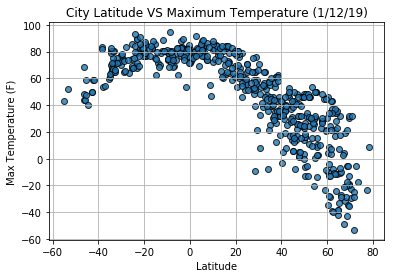

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude VS Maximum Temperature (1/12/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperaturevslatitude.png")



#### Latitude vs. Humidity Plot

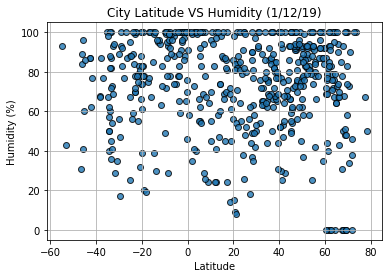

In [29]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude VS Humidity (1/12/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperaturevshumidity.png")

In [27]:
#Clean up the bad humidity data point from one city
weather_df=weather_df[weather_df["Humidity"]<=100]
# weather_2=weather_df[[weather_df["Humidity"]<=100]]
# weather_2

#### Latitude vs. Cloudiness Plot

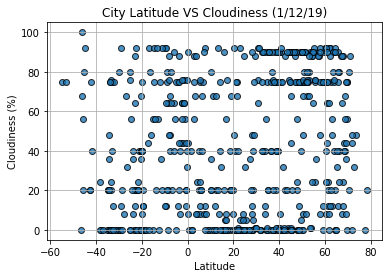

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude VS Cloudiness (1/12/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperaturevscloudiness.png")

#### Latitude vs. Wind Speed Plot

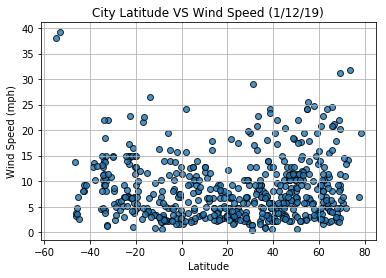

In [14]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude VS Wind Speed (1/12/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperaturevswindspeed.png")